In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
conda install git

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/tensorflow/examples.git

  Running command git clone -q https://github.com/tensorflow/examples.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-3ltt0a7y'
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.



  Cloning https://github.com/tensorflow/examples.git to c:\users\user\appdata\local\temp\pip-req-build-3ltt0a7y
  Created wheel for tensorflow-examples: filename=tensorflow_examples-a55fdb95c2a8545eaa964ac15ed13fbed3004b93_-py3-none-any.whl size=272863 sha256=77f88e78b2a6bda9cf3a43979ed0aff9455d8e694ff7a24cf37950c38f29ff8f
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-kp30b86z\wheels\4e\f5\c2\bfe75b834c9028b2529023bf74541c46ead531b513a8010d21
Failed to build tensorflow-examples
  Attempting uninstall: tensorflow-examples
    Found existing installation: tensorflow-examples 003510183c4a425236788b44d153b92fb4c7423a-
    Uninstalling tensorflow-examples-003510183c4a425236788b44d153b92fb4c7423a-:
      Successfully uninstalled tensorflow-examples-003510183c4a425236788b44d153b92fb4c7423a-
    Running setup.py install for tensorflow-examples: started
    Running setup.py install for tensorflow-examples: finished with status 'done'


In [4]:
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.experimental.AUTOTUNE
#AUTOTUNE = tf.data.AUTOTUNE

In [5]:
import skimage
from skimage.io import imshow, imread
from skimage.transform import resize
import os
import numpy as np
path = r'D:\Leuk Dataset\new fol\val\all'
all_list = os.listdir(path)

train_data = np.zeros((len(all_list), 256, 256, 3), dtype=np.uint8)

index = 0
for x in range(len(all_list)):
    img = imread(os.path.join(path, all_list[x]))
    img = resize(img, (256,256,3), preserve_range=True,  mode='constant')
    train_data[index] = img
    index+=1
print(train_data.shape)
print(type(train_data))
# print(train_data.dtype)
# train_data = train_data / 255.0
# print(np.unique(train_data))
# print(train_data.dtype)
# train_data = train_data.astype('float32')
# print(train_data.dtype)

(1219, 256, 256, 3)
<class 'numpy.ndarray'>


In [6]:
import tensorflow as tf
train_all = tf.data.Dataset.from_tensor_slices((train_data))
train_all

<TensorSliceDataset shapes: (256, 256, 3), types: tf.uint8>

In [7]:
import skimage
from skimage.io import imshow, imread
import os
import numpy as np
path = r'D:\Leuk Dataset\new fol\val\hem'
hem_list = os.listdir(path)

train_data = np.zeros((len(hem_list), 256, 256, 3), dtype=np.uint8)

index = 0
for x in range(len(hem_list)):
    img = imread(os.path.join(path, hem_list[x]))
    img = resize(img, (256,256,3), preserve_range=True,  mode='constant')
    train_data[index] = img
    index+=1
print(train_data.shape)
print(type(train_data))
# print(train_data.dtype)
# train_data = train_data / 255.0
# print(np.unique(train_data))
# print(train_data.dtype)
# train_data = train_data.astype('float32')
# print(train_data.dtype)

(648, 256, 256, 3)
<class 'numpy.ndarray'>


In [8]:
import tensorflow as tf
train_hem = tf.data.Dataset.from_tensor_slices((train_data))
train_hem

<TensorSliceDataset shapes: (256, 256, 3), types: tf.uint8>

In [9]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH =  256
IMG_HEIGHT = 256

In [10]:
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [11]:
# normalizing the images to [-1, 1]
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

In [12]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

In [13]:
def preprocess_image_train(image):
  image = random_jitter(image)
  image = normalize(image)
  return image

In [14]:
def preprocess_image_test(image):
  image = normalize(image)
  return image

In [15]:
train_all = train_all.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_hem = train_hem.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

# test_horses = test_horses.map(
#     preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
#     BUFFER_SIZE).batch(BATCH_SIZE)

# test_zebras = test_zebras.map(
#     preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
#     BUFFER_SIZE).batch(BATCH_SIZE)

In [16]:
train_hem

<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>

In [17]:
sample_all = next(iter(train_all))
sample_hem = next(iter(train_hem))

<class 'tensorflow.python.framework.ops.EagerTensor'>
Before slicing:  (1, 256, 256, 3)
After slicing:  (256, 256, 3)
[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921568 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.06274509 0.06666666
 0.07058823 0.0745098  0.07843137 0.08235294 0.0862745  0.09019607
 0.09411764 0.09803921 0.10196078 0.10588235 0.10980392 0.11372548
 0.11764705 0.12156862 0.12549019 0.12941176 0.13333333 0.1372549
 0.14117646 0.14509803 0.1490196  0.15294117 0.15686274 0.1607843
 0.16470587 0.16862744 0.17254901 0.17647058 0.18039215 0.18431371
 0.18823528 0.19215685 0.19607842 0.19999999 0.20392156 0.20784312
 0.2117647  0.21568626 0.21960783 0.2235294  0.22745097 0.23137254
 0.2352941  0.23921567 0.24313724 0.24705881 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.3

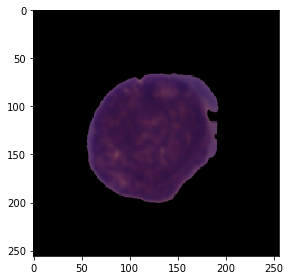

In [18]:
import numpy as np
import skimage
from skimage.io import imshow, imread
print(type(sample_all))
img = sample_all.numpy()
print('Before slicing: ', img.shape)
img = img[0,:,:,:]
img = img * 0.5 + 0.5
print('After slicing: ', img.shape)
print(np.unique(img))
imshow(img)

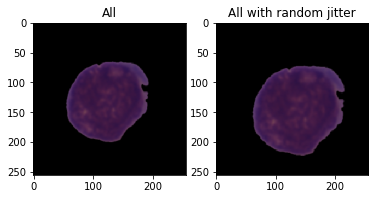

In [19]:
plt.subplot(121)
plt.title('All')
plt.imshow(sample_all[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('All with random jitter')
plt.imshow(random_jitter(sample_all[0]) * 0.5 + 0.5)

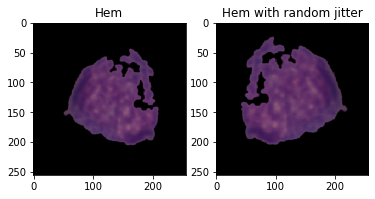

In [20]:
plt.subplot(121)
plt.title('Hem')
plt.imshow(sample_hem[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Hem with random jitter')
plt.imshow(random_jitter(sample_hem[0]) * 0.5 + 0.5)

In [21]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


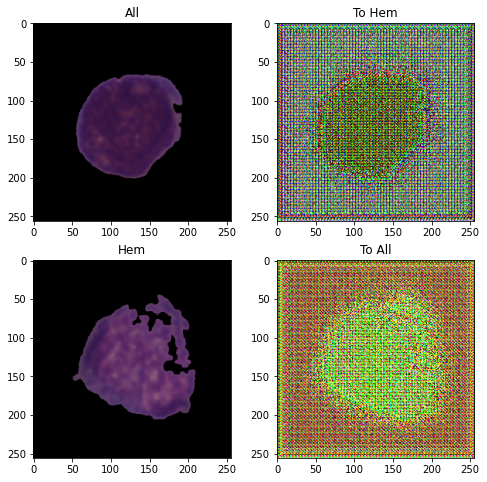

In [22]:
to_hem = generator_g(sample_all)
to_all = generator_f(sample_hem)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_all, to_hem, sample_hem, to_all]
title = ['All', 'To Hem', 'Hem', 'To All']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

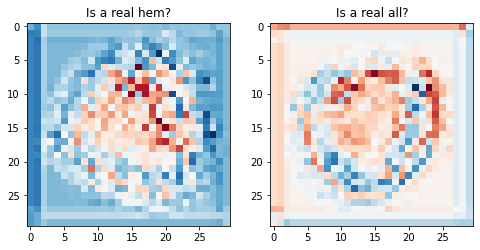

In [23]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real hem?')
plt.imshow(discriminator_y(sample_hem)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real all?')
plt.imshow(discriminator_x(sample_all)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [24]:
LAMBDA = 10

loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [25]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss * 0.5

In [26]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [27]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [28]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.5 * loss

In [29]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [30]:
checkpoint_path = r"D:\Leuk Dataset\Checkpoint"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [31]:
EPOCHS = 100

def generate_images(model, test_input):
  prediction = model(test_input)

  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [32]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)

    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)

    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)

    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)

    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)

    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)

    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)

  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)

  discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))

  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

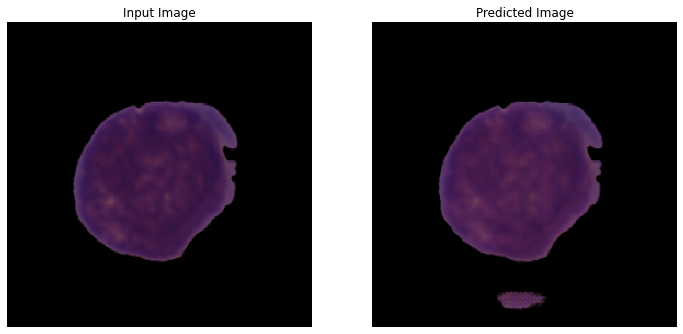

Saving checkpoint for epoch 100 at D:\Leuk Dataset\Checkpoint\ckpt-40
Time taken for epoch 100 is 386.86785650253296 sec



In [33]:
for epoch in range(EPOCHS):
  start = time.time()

  n = 0
  for image_x, image_y in tf.data.Dataset.zip((train_all, train_hem)):
    train_step(image_x, image_y)
    if n % 10 == 0:
      print ('.', end='')
    n += 1

  clear_output(wait=True)
  # Using a consistent image (sample_horse) so that the progress of the model
  # is clearly visible.
  generate_images(generator_g, sample_all)

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                      time.time()-start))

In [34]:
a

NameError: name 'a' is not defined

In [35]:
EPOCHS = 40

def generate_images(model, test_input):
  prediction = model(test_input)
  print(type(prediction))
  print(prediction.dtype)
  return prediction[0] # new line
  print('Ok')
#   plt.figure(figsize=(12, 12))

#   display_list = [test_input[0], prediction[0]]
#   title = ['Input Image', 'Predicted Image']

#   for i in range(2):
#     plt.subplot(1, 2, i+1)
#     plt.title(title[i])
#     # getting the pixel values between [0, 1] to plot it.
#     plt.imshow(display_list[i] * 0.5 + 0.5)
#     plt.axis('off')
#   plt.show()
#   return prediction # new line
#   print('Ok')

<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'float32'>
Returned:  <class 'tensorflow.python.framework.ops.EagerTensor'>
Returned:  <dtype: 'float32'>
Returned:  (256, 256, 3)
Returned:  <class 'numpy.ndarray'>
Returned:  float32
<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'float32'>
Returned:  <class 'tensorflow.python.framework.ops.EagerTensor'>
Returned:  <dtype: 'float32'>
Returned:  (256, 256, 3)
Returned:  <class 'numpy.ndarray'>
Returned:  float32
<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'float32'>
Returned:  <class 'tensorflow.python.framework.ops.EagerTensor'>
Returned:  <dtype: 'float32'>
Returned:  (256, 256, 3)
Returned:  <class 'numpy.ndarray'>
Returned:  float32
<class 'tensorflow.python.framework.ops.EagerTensor'>
<dtype: 'float32'>
Returned:  <class 'tensorflow.python.framework.ops.EagerTensor'>
Returned:  <dtype: 'float32'>
Returned:  (256, 256, 3)
Returned:  <class 'numpy.ndarray'>
Returned:  float32
<class 'tens

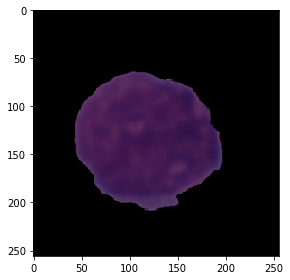

In [36]:
predicted_all = np.zeros((5, 256, 256, 3), dtype=np.float32)

index=0
# Run the trained model on the test dataset
for inp in train_all.take(5):
   im = generate_images(generator_g, inp)
   print('Returned: ', type(im))
   print('Returned: ', im.dtype)
   print('Returned: ', im.shape)
   im = im.numpy()
   print('Returned: ', type(im))
   #im  = im[0,:,:,:]
   im = im * 0.5 + 0.5
   print('Returned: ', im.dtype) 
   imshow(im)
#    break
#    print('Returned: ', im.shape)
#    print(np.max(im), np.min(im)) 
#    im = im * 0.5 + 0.5
#    print(np.max(im), np.min(im)) 
   predicted_all[index] = im 
   index+=1

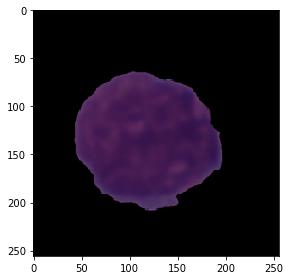

In [37]:
imshow(predicted_all[4])